#  <h1>Lab 4 : Zeri di funzione e ottimizzazione </h1>

# **Esercizio 1**: calcolo dello zero di una funzione  
---


# **Le funzioni in Python**

# Funzioni come argomento

In [ ]:
def upper_text(text):  
    return text.upper()  

upper_text2 = lambda text: text.upper()  
  
stringa = "Ciao ragazzi!" 

# chiamata alle funzioni

print('upper_text: ', upper_text (stringa) ) 
print('upper_text2: ', upper_text2 (stringa) ) 


# Funzione come argomento in input
print("\nFunzione come argomento:")

def hello(func):  
    # storing the function in a variable  
    greeting = func("Welcome, how are you doing?")  
    print(greeting) 

hello(upper_text2)      

def hello2(func, text = "Hello world"):  
    greeting = func(text)  
    print(greeting)

hello2(upper_text2, stringa)
hello2(upper_text2)  


upper_text:  CIAO RAGAZZI!
upper_text2:  CIAO RAGAZZI!

Funzione come argomento:
WELCOME, HOW ARE YOU DOING?
CIAO RAGAZZI!
HELLO WORLD


# **Esercizio** 

Scrivere una function che implementi il metodo di bisezione e una function per il metodo di Newton per il calcolo dello zero di una funzione f(x) per $x\in \mathbb{R}^{n}$.

Testare i due risolutori per risolvere $f(x) = e^x − x^2 = 0$, la cui soluzione è $x^∗ = −0.7034674$. In particolare:
* Disegnare il grafico della funzione $f$ nell’intervallo I = [−1,1] e verificare che $x^*$ sia lo zero di f in [-1, 1].
* Calcolare lo zero della funzione utilizzando entrambe le funzioni precedentemente scritte.
* Confrontare l'accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
* Modificare le due funzioni in modo da calcolare l'errore $||x_k -x^*||_2$ ad ogni iterazione k-esima e graficare  

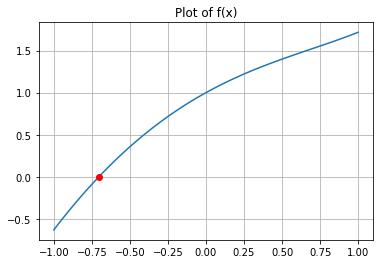

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x) - x**2

a = -1
b = 1

x = np.linspace(a, b, 100)

plt.plot(x, f(x))
plt.title('Plot of f(x)')
plt.grid()

# Valore esatto
x_true = -0.7034674

plt.plot(x_true, f(x_true), 'ro')
plt.show()

In [30]:
def bisezione(f, a, b, tol, maxit):
    if a*b > 0:
        return "Non converge"
    else:
        k = 0
        c = (a+b)/2
        while ((abs(f(c)) > tol) and k<maxit):
            if f(a)*f(c) < 0:
                b = c
            else: 
                a = c
            c = (a+b)/2
            k = k+1
    return k, c

tol = 1e-6
maxit = 100

k, x_bisezione = bisezione(f, a, b, tol, maxit)

acc_bisezione = abs(x_true-x_bisezione)

print('x_bisezione: ', x_bisezione)
print('x_true: ', x_true)
print(acc_bisezione)
print(k)
################################################
from numpy import random

def derivata(x):
    return np.e**x-2*x

derivata2 = lambda x: derivata(x)

def newton(f, a, b, tolf, maxit, derivata):
    if a*b > 0:
        return "Non converge"
    else:
        k=0
        err = np.zeros((maxit))
        x0 = a
        while (abs(f(x0)) > tolf and k < maxit):
            x1 = x0-f(x0)/derivata(x0)
            x0 = x1
            err[k] = abs(x_true - x1)
            k+=1

        err = err[0:k]
        return x1,k,err

x_newton, n_it, errori2 = newton(f, a, b, tol, maxit, derivata2)
print('n iterazioni newton: ', n_it)
print(abs(x_true - x_newton))

x_bisezione:  -0.7034673690795898
x_true:  -0.7034674
3.092041012120461e-08
20
n iterazioni newton:  3
6.83317975536113e-08


# **Esercizio 2**: metodo del gradiente per l'ottimizzazione in $\mathbb{R}^2$
----

## **Superfici in Python**




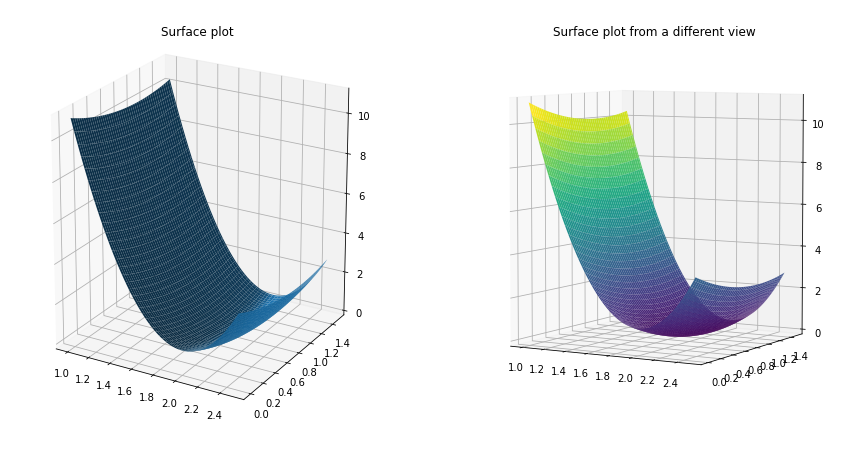

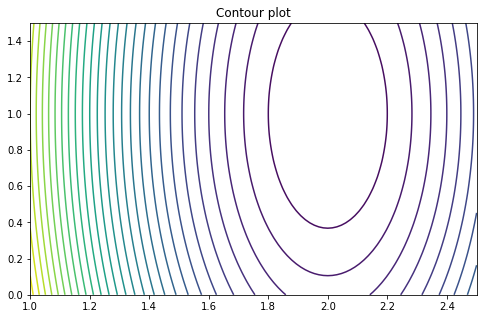

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
#from matplotlib import style


def f(x,y):
    return 10*(x-2)**2 + 1*(y-1)**2

#f= lambda x,y: 10*(x-1)**2 + 10*(y-1)**2

x = np.linspace(1,2.5,100)
y = np.linspace(0,1.5, 100)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)

plt.figure(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z , cmap='viridis')
ax1.set_title('Surface plot')
ax1.view_init(elev=20)

ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title('Surface plot from a different view')
ax2.view_init(elev=5)
plt.show()

plt.figure(figsize=(8, 5))

contours = plt.contour(X, Y, Z, levels=30)
plt.title('Contour plot')
plt.show()


# **Esercizio**

Scrivere due funzioni che implementino il metodo del gradiente rispettivamente con:
1. step size $\alpha>0$ costante, passato in input;
2. step size $\alpha_k$ variabile, calcolato secondo la procedura di backtracking ad ogni iterazione k-esima.

Testare le due function per minimizzare f(x) definita come 
$$f(x)=\lVert x - b \rVert_{2}^{2} + \lambda \lVert x \rVert_{2}^{2}$$
dove
*  $x, b \in \mathbb{R}^{2}$
*  $b=(1,1)$ 
*  $\lambda >0, \lambda \in \mathbb{R}$ è scelto a piacere.

In particolare:
* plotta la superficie f(x) con $\it plot\_surface$ e le curve di livello con $plt.contour$;
* confronta le soluzioni calcolate dal primo metodo con diversi valori di $\alpha$;
*  confronta le soluzioni dei due metodi al variare di $\lambda$.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def next_step(x,b,grad): # backtracking procedure for the choice of the steplength
  alpha=1.1
  rho = 0.5
  c1 =0.25
  
  ....

In [ ]:
#Plot the function, the contour, the iterations computed on the contour plot

def minimize(x0,x1,b,mode,step,MAXITERATION,ABSOLUTE_STOP): # funzione che implementa il metodo del gradiente
  #declare x_k and gradient_k vectors
  x=np.zeros((2,MAXITERATION))
  grad_list=np.zeros((2,MAXITERATION))
  
  #initialize first values
  x[:,0] = np.array([x0,x1])
  grad_list[:,0] = grad_f(x[:,0],b)
  #print(x[:,0])
  
  k=0
  while (np.linalg.norm(grad_list[:,k])>ABSOLUTE_STOP and k < MAXITERATION ):
    
  ....

  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x[0,k],x[1,k]))
  #print('gradients:')
  #print(grad_list[:,0:i])
 
  #plots
  v_x0 = np.linspace(-5,5,500)
  v_x1 = np.linspace(-5,5,500)
  x0v,x1v = np.meshgrid(v_x0,v_x1)
  z = f(x0v,x1v,b)

  ....
  
  return (x,grad_list,k)

In [ ]:
lmbd =0.1
b=np.array([1,1])

def f(x1,x2,b): # definizione funzione obiettivo da minimizzare
  ....

def grad_f(x,b): # definizione funzione  gradiente
  ....
  
step=0.1
MAXITERATIONS=100
ABSOLUTE_STOP=1.e-5
mode='fixed'
#mode = "backtrack" 

(x,g,i)= minimize(4,-5,b,mode,step,MAXITERATIONS, ABSOLUTE_STOP)

In [ ]:
 # GRAFICO DEGLI ITERATI 
# it contiene le coordinate 2D di tutti gli iterati del metodo 

#contours = plt.contour(X,Y,Z, 15)
#plt.plot(it[0:,0], it[0:,1], '-o')
#plt.show()